<a href="https://colab.research.google.com/github/KatBotkowska/CodersCrew/blob/master/Netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pobranie danych z Kaggle


###https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

##Importy - do przeniesienia z treści niżej

In [1]:
import pandas as pd
import numpy as np


In [2]:
#podłączenie google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
root_path = 'gdrive/My Drive/netflix/'

In [4]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kbotkowska","key":"90ebb11108c952959800f5549af3472d"}'}

In [6]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


##Pobranie i rozpakowanie danych kaggle - netflix

In [ ]:
!kaggle datasets download -d shivamb/netflix-shows

netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q netflix-shows.zip -d [netflix]

replace [netflix]/netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


##Pobranie i rozpakowanie danych kaggle - imdb

In [7]:
!kaggle datasets download -d stefanoleone992/imdb-extensive-dataset

 96% 79.0M/82.3M [00:02<00:00, 30.8MB/s]
100% 82.3M/82.3M [00:02<00:00, 34.9MB/s]


In [8]:
!unzip -q imdb-extensive-dataset.zip -d [netflix]

##Pobranie i rozpakowanie danych kaggle - movielens

In [ ]:
!kaggle datasets download -d grouplens/movielens-20m-dataset

movielens-20m-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q movielens-20m-dataset.zip -d [netflix]

replace [netflix]/genome_scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A
y


##Załadowanie dataframes

In [ ]:
netflix_titles = pd.read_csv('/content/[netflix]/netflix_titles.csv')

In [10]:
imdb_movies = pd.read_csv('/content/[netflix]/IMDb movies.csv')
imdb_names = pd.read_csv('/content/[netflix]/IMDb names.csv')
imdb_ratings = pd.read_csv('/content/[netflix]/IMDb ratings.csv')
imdb_title_principals = pd.read_csv('/content/[netflix]/IMDb title_principals.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
movielens_genome_scores = pd.read_csv('/content/[netflix]/genome_scores.csv')
movielens_genome_tags = pd.read_csv('/content/[netflix]/genome_tags.csv')
movielens_link = pd.read_csv('/content/[netflix]/link.csv')
movielens_movie = pd.read_csv('/content/[netflix]/movie.csv')
movielens_rating = pd.read_csv('/content/[netflix]/rating.csv')
movielens_tag = pd.read_csv('/content/[netflix]/tag.csv')

##Czyszczenie danych
zamiana wiersza z TV movie 2019 na 2019
dtypes z object na właściwe
NaN??
gatunki zamiana ze stringa na listy tagów


#Netflix - podstawowe dane


In [ ]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_titles.shape
#rozmiary  - wiersze i kolumny

(7787, 12)

In [ ]:
netflix_titles.info()


In [ ]:
netflix_titles.describe()
#trochę bez sensu, nie ma tutaj dużo danych numerycznych do podsumowań

##Netflix dla 2019

In [ ]:
netflix_2019 = netflix_titles.iloc[:,:][netflix_titles.release_year==2019]
netflix_2019.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."


In [ ]:
netflix_2019.shape

In [ ]:
imdb_movies.tail()

##IMDB dla 2019

In [ ]:
imdb_2019 = imdb_movies.iloc[:,:][imdb_movies.year==2019]
imdb_2019.head()

##Łączenie IMDB i Netflix dla 2019

In [ ]:
netflix_imdb_2019 = pd.merge(netflix_2019, imdb_2019, on=['title'])
netflix_imdb_2019.info()

In [ ]:
netflix_imdb_2019.shape

In [ ]:
netflix_imdb_2019

##Łączenie IMDB i Netflix dla wszystkich danych

In [ ]:
netflix_imdb_all = pd.merge(netflix_titles, imdb_movies, on=['title'])
netflix_imdb_all.info()

In [ ]:
netflix_imdb_all.head()

In [ ]:
imdb_movies.columns

# Szeregi czasowe - jak przez lata zmieniała się liczba wydawanych filmów? - Ewa

In [ ]:
import pandas as pd
imdb_movies = pd.read_csv('/content/[netflix]/IMDb movies.csv')

imdb_movies.head()

In [ ]:
imdb_movies.dtypes

In [ ]:
imdb_movies.groupby('year').imdb_title_id.count()

In [ ]:
imdb_movies[imdb_movies.year == 'TV Movie 2019']

In [ ]:
imdb_movies.loc[83917, 'year'] = 2019
imdb_movies.year = imdb_movies.year.astype('int')
imdb_movies.dtypes

In [ ]:
data_year_plot = imdb_movies.groupby('year').imdb_title_id.count()
data_year_plot.tail(20)

In [ ]:
import matplotlib.pyplot as plt

data_year_plot.plot()
plt.show()

In [ ]:
data_year_plot_from2004 = imdb_movies[imdb_movies.year > 2004].groupby('year').imdb_title_id.count()
data_year_plot_from2004.plot()

# chyba nie ma sensu brać do analizy roku 2020. zastanawiam się nad 2019 - czy przez covida tak mało, czy też braki danych.

In [ ]:
data_year_plot_to2009 = imdb_movies[imdb_movies.year <= 2009].groupby('year').imdb_title_id.count()
data_year_plot_to2009.plot()

In [ ]:
imdb_movies.loc[83917, 'date_published'] = '2019-01-01' #ustawiam 1 stycznia jako datę publikacji tego dziwnego filmu

pd.to_datetime(imdb_movies['date_published'])

In [ ]:
imdb_movies['date_published'].dt.year #nie wiem czemu wyskakuje błąd, dkoro wyżej widać, że ta kolumna już jest typem datetime

#Na lata jakie rodzaje filmów dominują, jakie trendy w gatunkach - KASIA

In [ ]:

imdb_movies = pd.read_csv('/content/[netflix]/IMDb movies.csv')

##Najczęściej występujące gatunki

In [ ]:
imdb_movies['genre'].value_counts().head(10)

In [ ]:
ax = imdb_movies['genre'].value_counts().head().plot.barh( rot=0)

##Ilość gatunków w poszczególnych latach
Widać, że gatunki to 'tagi' opisujące film, do jednego filmu przypisuje się coraz więcej gatunków.

In [ ]:
#ilość gatunków w poszczególnych latach
imdb_movies.groupby('year').genre.count().tail(20)

##Lista wszystkich gatunków

In [ ]:
genres = imdb_movies['genre'].unique().tolist()
genres_all=[]
for genre in genres:
    for elem in genre.split(','):
        genres_all.append(elem.strip())
genres_all=list(set(genres_all))
genres_all

##Unikalne gatunki - najbardziej popularne

In [ ]:
genres = imdb_movies['genre'].tolist()
genres_count=[]
for genre in genres:
    for elem in genre.split(','):
        genres_all.append(elem.strip())
genres_count=list(genres_all)
from collections import Counter
genres_count_all=pd.DataFrame.from_dict(Counter(genres_count), orient='index')
genres_count_all.rename(columns={'index':'genres', 0:'occurences'}, inplace=True)
genres_count_all.sort_values(by='occurences', ascending=False)


In [ ]:
ax = genres_count_all.sort_values(by='occurences', ascending=False).head().plot.barh(rot=1, title='Genres by occurences')
ax.set_xlabel('occurences')
#ax.set_ylabel()


##Gatunki na lata

In [ ]:
imdb_movies['genre_list']=imdb_movies['genre'].str.split(',', n=5)
#imdb_movies['genre_list'].value_counts().head(10)

In [ ]:
genres_by_years=imdb_movies[['genre', 'year']].groupby(['year', 'genre'], as_index=True)['genre'].count()
genres_by_years.tail(100)

In [ ]:
#dla roku 2019 zamiana str gatunków na listę
genres_split_by_years=imdb_movies[['genre', 'year', 'imdb_title_id']]
genres_split_by_years[genres_split_by_years['year']=='2019']
genres = genres_split_by_years['genre']

new_genres=[]
for genre in genres.to_list():
    genre = genre.split(',')
    new_genres.append(genre)

genres_split_by_years['new_genre']=new_genres
genres_split_by_years


In [ ]:
genres_in_2019 = genres_split_by_years[genres_split_by_years['year']=='2019']
genres_2019=genres_in_2019['new_genre'].to_list()
genres_2019

In [ ]:
genres_count=[]
genres_all=[]
for genres in genres_2019:
    for genre in genres:
        genres_all.append(genre)
genres_count_2019=list(genres_all)
from collections import Counter
genres_count_all_2019=pd.DataFrame.from_dict(Counter(genres_count_2019), orient='index')
genres_count_all_2019.rename(columns={'index':'genres', 0:'occurences'}, inplace=True)

genres_count_all_2019.sort_values(by='occurences', ascending=False)

In [ ]:
#Genres by years

table={}
years = ['2010', '2011', '2012','2013','2014','2015','2016', '2017','2018','2019']
genres = ['Drama', 'Comedy', 'Romance', 'Action', 'Thriller','Crime', 'Horror']

for year in years:

    genres_in_year = genres_split_by_years[genres_split_by_years['year']==year]['new_genre']
    genres_in_year=[item.strip() for sublist in genres_in_year for item in sublist]
    table[year]={}
    for genre in genres: ##genres_all nie działa???
        table[year][genre]=genres_in_year.count(genre)

genres_in_years = pd.DataFrame(table)
genres_in_years
   



In [ ]:
genres_in_years.T.plot()

In [ ]:
#sprawdzenie roku 2010
genres_in_2010 = genres_split_by_years[genres_split_by_years['year']=='2010']
genres_2010=genres_in_2010['new_genre'].to_list()
genres_2010

In [ ]:
data_year_plot = imdb_movies.groupby('year').imdb_title_id.count()
data_year_plot.tail(20)

# Jakie kraje dominują w produkcji filmów  - które wypuszczają najwięcej filmów, i z 5 największych zrobić szeregi czasowe - GRZESIEK

In [ ]:
import pandas as pd
imdb_movies = pd.read_csv('/content/[netflix]/IMDb movies.csv')

In [ ]:
''' 
Po pierwsze, te kraje są bardzo dziwne. Po drugie nie jestem 
w stanie określić która firma produkcyjna należy do danego kraju. 
Po trzecie te wszystkie kraje pokazują gdzie filmy zostały nakręcone.
'''
imdb_movies['country'].value_counts().head(10)

In [ ]:
'''
Te wykresy są okej, ale później jest coś nie tak...
'''
import matplotlib.pyplot as plt
import seaborn as sn
chart_country = imdb_movies['country'].value_counts().head(10)
chart_country.plot(kind='barh', figsize=(16,8), fontsize=13)
plt.title("Where the movies were filmed", fontsize=10)
plt.xlabel('Number of movies')
plt.ylabel('Countries')
plt.show()

In [ ]:
'''
Jak tutaj widzimy że daty się pomieszały. Spróbowałem sortować datę i nie jestem w stanie tego naprawić.
'''
imdb_movies.groupby('year').country.count().plot()

In [ ]:
countries_new = imdb_movies[['year', 'country']]
countries_new

In [ ]:
'''
Teraz sprawdzam produkcję filmu. Jak widać że czołowe firmy należą do USA oprócz Mosfilm i Canal+.
'''
imdb_movies['production_company'].value_counts().head(20)

In [ ]:
imdb_production = imdb_movies['production_company'].value_counts()
imdb_production.iloc[:10].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("production companies and number of movies",fontsize=15)
plt.xlabel('number of movies',fontsize=14)
sn.set_style("whitegrid")

In [ ]:
'''
Tutaj niestety jest za mało kolumn żeby określić w których krajach produkowali najwięcej 
filmików, więc sprawdzam które produkcje filmowe zostały najbardziej ocenione.
'''
imdb_movies.corr()

In [ ]:
movie_sliced = imdb_movies[0:1000]


plt.figure(figsize=(15,15))
sn.swarmplot(x='avg_vote', y='country', data = movie_sliced)
plt.title ('Which countries have the best productions?', fontsize=20, fontweight='bold')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()

#Ile przypadków, że scenarzysta jest jednocześnie reżyserem w filmie - EWA

In [ ]:
imdb_movies = pd.read_csv('/content/[netflix]/IMDb movies.csv')

In [ ]:
imdb_movies[imdb_movies.writer == imdb_movies.director].director.count()
# to tak prosto, czyli odpowiada na postawione pytanie, 
# ale tylko wtedy jeśli jest jeden reżyser i jeden scenarzysta.

In [ ]:
imdb_movies['writer_1'] = imdb_movies.writer.str.split(pat=',', expand=True)[0]
imdb_movies['writer_2'] = imdb_movies.writer.str.split(pat=',', expand=True)[1]
imdb_movies[['writer_1', 'writer_2']]

In [ ]:
imdb_movies['director_1'] = imdb_movies.director.str.split(pat=',', expand=True)[0]
imdb_movies['director_2'] = imdb_movies.director.str.split(pat=',', expand=True)[1]
imdb_movies[['director_1', 'director_2']]

In [ ]:
# tu taki brzydki długi warunek :)
# ale wydaje mi się, że dobrze porównuje i zlicza wyżej utworzone kolumny

imdb_movies[(imdb_movies.writer_1 == imdb_movies.director_1) | 
        (imdb_movies.writer_1 == imdb_movies.director_2) | 
        (imdb_movies.writer_2 == imdb_movies.director_1) | 
        (imdb_movies.writer_2 == imdb_movies.director_2)].imdb_title_id.count()

#Reżyser - z największymi średnimi głosów, największa liczba głosów - KASIA

In [ ]:
imdb_movies = pd.read_csv('/content/[netflix]/IMDb movies.csv')

In [ ]:
imdb_movies.columns

In [ ]:
#Reżyserzy z największą średnią ocen, którzy nakręcili więcej niż 5 filmów
imdb_directors_av_votes=imdb_movies[['director','avg_vote']].groupby('director').agg(['count', 'mean']).reset_index()
imdb_directors_av_votes[imdb_directors_av_votes['avg_vote']['count']>5].sort_values(by=('avg_vote','mean'), ascending=False).reset_index().head(10)

In [ ]:
#reżyserzy, którzy kręcą dużo i źle ;)
imdb_directors_av_votes[imdb_directors_av_votes['avg_vote']['count']>10].sort_values(by=('avg_vote','mean'), ascending=True).head(10)

In [ ]:
#jakie oceny dostają reżyserzy którzy idą 'na ilość'
imdb_directors_av_votes[imdb_directors_av_votes['avg_vote']['count']>5].sort_values(by=('avg_vote','count'), ascending=False).head(10)

In [ ]:
#Reżyserzy których filmy otrzymują średnio najwięcej głosów, którzy nakręcili więcej niż 5 filmów
imdb_directors_sum_votes=imdb_movies[['director','votes']].groupby('director').agg(['count', 'sum']).reset_index()
imdb_directors_sum_votes['votes_per_film'] = imdb_directors_sum_votes['votes']['sum']/imdb_directors_sum_votes['votes']['count']
imdb_directors_sum_votes['votes_per_film']=imdb_directors_sum_votes['votes_per_film'].astype('int')
imdb_directors_sum_votes[imdb_directors_sum_votes['votes']['count']>5].sort_values(by=('votes_per_film'), ascending=False).head(10)

#Scenarzysta - jw - GRZESIEK

In [ ]:
imdb_movies = pd.read_csv('/content/[netflix]/IMDb movies.csv')

In [ ]:
imdb_movies.columns

In [ ]:
imdb_writers_av_votes=imdb_movies[['writer','avg_vote']].groupby('writer').agg(['count', 'mean']).reset_index()
imdb_writers_av_votes[imdb_writers_av_votes['avg_vote']['count']>10].sort_values(by=('avg_vote','mean'), ascending=False).reset_index().head(10)

In [ ]:
imdb_writers_av_votes[imdb_writers_av_votes['avg_vote']['count']>10].sort_values(by=('avg_vote','mean'), ascending=True).head(10)

In [ ]:
imdb_writers_av_votes[imdb_writers_av_votes['avg_vote']['count']>5].sort_values(by=('avg_vote','count'), ascending=False).head(10)

In [ ]:
imdb_writers_sum_votes=imdb_movies[['writer','votes']].groupby('writer').agg(['count', 'sum']).reset_index()
imdb_writers_sum_votes['votes_per_film'] = imdb_writers_sum_votes['votes']['sum']/imdb_writers_sum_votes['votes']['count']
imdb_writers_sum_votes['votes_per_film']=imdb_writers_sum_votes['votes_per_film'].astype('int')
imdb_writers_sum_votes[imdb_writers_sum_votes['votes']['count']>5].sort_values(by=('votes_per_film'), ascending=False).head(10)

#Reżyser - dochód z filmów - Kasia

##Reżyserzy z największą ilością filmów

In [108]:
#Reżyserzy z największą ilością filmów
imdb_movies['director'].value_counts().head(10)

Jesús Franco        87
Michael Curtiz      85
Lesley Selander     78
Lloyd Bacon         73
William Beaudine    70
Richard Thorpe      68
John Ford           67
Gordon Douglas      64
Raoul Walsh         61
Mervyn LeRoy        59
Name: director, dtype: int64

##Reżyserzy, których filmy osiągnęły największy dochód na świecie - dot. dochodów w USD - może zrobić jeszcze INR rupię indyjską? Bolywood? Może filmy kręcone w Chinach (jaka waluta?) jaki mają dochód?

In [109]:
imdb_movies['worlwide_gross_income']

0              0
1              0
2              0
3              0
4              0
          ...   
85850    3507171
85851    7299062
85852          0
85853       2833
85854      59794
Name: worlwide_gross_income, Length: 85855, dtype: int64

In [110]:
#Wyczyszczenie NaN
imdb_movies['worlwide_gross_income'].replace(np.nan, '$ 0', inplace=True)

In [111]:
#poprzez split oddzielenie waluty od wartości
imdb_movies['worlwide_gross_income']=imdb_movies['worlwide_gross_income'].apply(lambda x: x.split())


AttributeError: ignored

In [16]:
#Wydzielenie walut do osobnej kolumny
imdb_movies['currency_for_wwincome']=imdb_movies['worlwide_gross_income'].apply(lambda x: x[0])

In [17]:
#Waluty występujące w worlwide gross income
imdb_movies['currency_for_wwincome'].unique()

array(['$', 'GBP', 'INR', 'NPR', 'PKR'], dtype=object)

In [18]:
#kolumna z worlwide gross income tylko z wartościami
imdb_movies['worlwide_gross_income']=imdb_movies['worlwide_gross_income'].apply(lambda x: x[1])

In [19]:
#zmiana stringów na int
imdb_movies['worlwide_gross_income']=imdb_movies['worlwide_gross_income'].astype(int)

In [22]:
#nowa df z danymi gdzie worlwide_gross_income w dolarach
imdb_movies_USD = imdb_movies[imdb_movies['currency_for_wwincome']=='$']

In [23]:
#zmiana typu z obj na int
imdb_movies_USD['worlwide_gross_income'] =imdb_movies_USD['worlwide_gross_income'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
imdb_movies_USD['worlwide_gross_income']

0              0
1              0
2              0
3              0
4              0
          ...   
85850    3507171
85851    7299062
85852          0
85853       2833
85854      59794
Name: worlwide_gross_income, Length: 85794, dtype: int64

In [ ]:
#Wyczyszczenie $ i spacji - tak się nie da bo różne waluty
#imdb_movies['worlwide_gross_income']=imdb_movies['worlwide_gross_income'].apply(lambda x: x[2:])


In [25]:
#Reżyserzy z największym dochodem w dolarach-dochód z wszystkich filmów
imdb_director_worlwide_income=imdb_movies_USD.groupby('director').agg({'imdb_title_id':'count','worlwide_gross_income':'sum'}).reset_index().rename(columns={'imdb_title_id':'films_count'}).sort_values(by='worlwide_gross_income', ascending=False)
imdb_director_worlwide_income.head(20)

,director,films_count,worlwide_gross_income
30601,Steven Spielberg,32,10521265279
2352,"Anthony Russo, Joe Russo",6,6848715547
25192,Peter Jackson,13,6601458791
21769,Michael Bay,14,6451692798
13738,James Cameron,7,6185441282
7486,David Yates,8,6021255883
5748,Christopher Nolan,11,4870773767
13335,J.J. Abrams,6,4653989459
27840,Ron Howard,25,4390732419
16072,Jon Favreau,9,4348727274


In [26]:
#średni dochów z filmów na świecie
imdb_director_worlwide_income['average_worlwide_income']=imdb_director_worlwide_income['worlwide_gross_income']/imdb_director_worlwide_income['films_count']
imdb_director_worlwide_income['average_worlwide_income']=imdb_director_worlwide_income['average_worlwide_income'].astype(int)
imdb_director_worlwide_income.sort_values(by='average_worlwide_income', ascending=False).head()

,director,films_count,worlwide_gross_income,average_worlwide_income
5362,"Chris Buck, Jennifer Lee",2,2730830286,1365415143
2352,"Anthony Russo, Joe Russo",6,6848715547,1141452591
18500,"Kyle Balda, Pierre Coffin",2,2194242538,1097121269
16531,Josh Cooley,1,1073394593,1073394593
18950,Lee Unkrich,1,1066969703,1066969703


##Bollywood

In [ ]:
##Bolywood
#nowa df z danymi gdzie worlwide_gross_income w rupii indyjskiej 
imdb_movies_INR = imdb_movies[imdb_movies['currency_for_wwincome']=='INR']

In [ ]:
#zmiana typu z obj na int
imdb_movies_INR['worlwide_gross_income'] =imdb_movies_INR['worlwide_gross_income'].astype(int)

In [ ]:
#Reżyserzy z największym dochodem w rupii indyjskiej
imdb_movies_INR.groupby('director').agg({'imdb_title_id':'count','worlwide_gross_income':'sum'}).reset_index().rename(columns={'imdb_title_id':'films_count'}).sort_values(by='worlwide_gross_income', ascending=False).head(10)

##Reżyserzy dochód z filmów w USA

In [ ]:
imdb_movies[imdb_movies['usa_gross_income'].notnull()].head()

In [28]:
imdb_movies['usa_gross_income']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
85850    NaN
85851    NaN
85852    NaN
85853    NaN
85854    NaN
Name: usa_gross_income, Length: 85855, dtype: object

In [29]:
#Wyczyszczenie NaN
imdb_movies['usa_gross_income'].replace(np.nan, '$ 0', inplace=True)

In [30]:
#poprzez split oddzielenie waluty od wartości
imdb_movies['usa_gross_income']=imdb_movies['usa_gross_income'].apply(lambda x: x.split())


In [32]:
#Wydzielenie walut do osobnej kolumny
imdb_movies['currency_for_usaincome']=imdb_movies['usa_gross_income'].apply(lambda x: x[0])

In [33]:
#Waluty występujące w USA gross income
imdb_movies['currency_for_usaincome'].unique()

array(['$', 'EUR', 'GBP', 'HKD'], dtype=object)

In [34]:
#kolumna z USA gross income tylko z wartościami
imdb_movies['usa_gross_income']=imdb_movies['usa_gross_income'].apply(lambda x: x[1])

In [35]:
#zmiana stringów na int
imdb_movies['usa_gross_income']=imdb_movies['usa_gross_income'].astype(int)

In [36]:
#nowa df z danymi gdzie usa_gross_income w dolarach
imdb_movies_USD = imdb_movies[imdb_movies['currency_for_usaincome']=='$']

In [37]:
#zmiana typu z obj na int
imdb_movies_USD['usa_gross_income'] =imdb_movies_USD['usa_gross_income'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
imdb_movies_USD['usa_gross_income']

0        0
1        0
2        0
3        0
4        0
        ..
85850    0
85851    0
85852    0
85853    0
85854    0
Name: usa_gross_income, Length: 85850, dtype: int64

In [39]:
#Reżyserzy z największym dochodem w dolarach
imdb_director_USA_income = imdb_movies_USD.groupby('director').agg({'imdb_title_id':'count','usa_gross_income':'sum'}).reset_index().rename(columns={'imdb_title_id':'films_count'}).sort_values(by='usa_gross_income', ascending=False).head(20)
imdb_director_USA_income

,director,films_count,usa_gross_income
30607,Steven Spielberg,32,4510254035
21771,Michael Bay,14,2326509503
2353,"Anthony Russo, Joe Russo",6,2281004133
13336,J.J. Abrams,6,2199407427
25197,Peter Jackson,13,2134677462
27845,Ron Howard,25,2106835706
5749,Christopher Nolan,11,2006601194
6005,Clint Eastwood,38,1978448340
13739,James Cameron,7,1950027629
27526,Robert Zemeckis,18,1949943723


In [40]:
#średni dochód z filmów w USA
imdb_director_USA_income['average_USA_income']=imdb_director_USA_income['usa_gross_income']/imdb_director_USA_income['films_count']
imdb_director_USA_income['average_USA_income']=imdb_director_USA_income['average_USA_income'].astype(int)
imdb_director_USA_income.sort_values(by='average_USA_income', ascending=False).head(15)

,director,films_count,usa_gross_income,average_USA_income
2353,"Anthony Russo, Joe Russo",6,2281004133,380167355
13336,J.J. Abrams,6,2199407427,366567904
10749,George Lucas,6,1743927501,290654583
13739,James Cameron,7,1950027629,278575375
7487,David Yates,8,1792652412,224081551
9950,Francis Lawrence,7,1481481244,211640177
16073,Jon Favreau,9,1879970186,208885576
5749,Christopher Nolan,11,2006601194,182418290
21771,Michael Bay,14,2326509503,166179250
25197,Peter Jackson,13,2134677462,164205958


##Reżyserzy - dochód na swiecie i w USA

In [41]:
#Reżyserzy z największym średnim dochodem na film w dolarach (tam gdzie i dochód na świecie i dochód w USA jest w $)
imdb_movies_income_USD = imdb_movies[imdb_movies.currency_for_usaincome.eq('$') & imdb_movies.currency_for_wwincome.eq('$')]
imdb_average_income = imdb_movies_income_USD.groupby('director').agg({'imdb_title_id':'count','usa_gross_income':'mean', 'worlwide_gross_income':'mean'}).reset_index().rename(columns={'imdb_title_id':'films_count'}).sort_values(by='worlwide_gross_income', ascending=False)
imdb_average_income['usa_gross_income'] = imdb_average_income['usa_gross_income'].astype(int)
imdb_average_income['worlwide_gross_income'] = imdb_average_income['worlwide_gross_income'].astype(int)
imdb_average_income.head()


,director,films_count,usa_gross_income,worlwide_gross_income
5362,"Chris Buck, Jennifer Lee",2,439055793,1365415143
2352,"Anthony Russo, Joe Russo",6,380167355,1141452591
18500,"Kyle Balda, Pierre Coffin",2,300335035,1097121269
16531,Josh Cooley,1,434038008,1073394593
18950,Lee Unkrich,1,415004880,1066969703


##Reżyserzy - budżet filmów

In [42]:
imdb_movies[imdb_movies['budget'].notnull()].head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,currency_for_wwincome,currency_for_usaincome
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,0,0,NaN,7.0,7.0,$,$
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,0,0,NaN,25.0,3.0,$,$
7,tt0002445,Quo Vadis?,Quo Vadis?,1913,1913-03-01,"Drama, History",120,Italy,Italian,Enrico Guazzoni,"Henryk Sienkiewicz, Enrico Guazzoni",Società Italiana Cines,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...","An epic Italian film ""Quo Vadis"" influenced ma...",6.2,273,ITL 45000,0,0,NaN,7.0,5.0,$,$
8,tt0002452,Independenta Romaniei,Independenta Romaniei,1912,1912-09-01,"History, War",120,Romania,NaN,"Aristide Demetriade, Grigore Brezeanu","Aristide Demetriade, Petre Liciu",Societatea Filmului de Arta Leon Popescu,"Aristide Demetriade, Constanta Demetriade, Con...",The movie depicts the Romanian War of Independ...,6.7,198,ROL 400000,0,0,NaN,4.0,1.0,$,$
9,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare",Le Film d'Art,"Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...,5.5,225,$ 30000,0,0,NaN,8.0,1.0,$,$


In [43]:
imdb_movies['budget']

0            NaN
1         $ 2250
2            NaN
3        $ 45000
4            NaN
          ...   
85850        NaN
85851        NaN
85852        NaN
85853        NaN
85854        NaN
Name: budget, Length: 85855, dtype: object

In [44]:
#Wyczyszczenie NaN
imdb_movies['budget'].replace(np.nan, '$ 0', inplace=True)

In [45]:
#poprzez split oddzielenie waluty od wartości
imdb_movies['budget']=imdb_movies['budget'].apply(lambda x: x.split())


In [46]:
#Wydzielenie walut do osobnej kolumny
imdb_movies['currency_for_budget']=imdb_movies['budget'].apply(lambda x: x[0])

In [47]:
#Waluty występujące w budget
imdb_movies['currency_for_budget'].unique()

array(['$', 'ITL', 'ROL', 'SEK', 'FRF', 'NOK', 'GBP', 'DEM', 'PTE', 'FIM',
       'CAD', 'INR', 'CHF', 'ESP', 'JPY', 'DKK', 'NLG', 'PLN', 'RUR',
       'AUD', 'KRW', 'BEF', 'XAU', 'HKD', 'NZD', 'CNY', 'EUR', 'PYG',
       'ISK', 'IEP', 'TRL', 'HRK', 'SIT', 'PHP', 'HUF', 'DOP', 'JMD',
       'CZK', 'SGD', 'BRL', 'BDT', 'ATS', 'BND', 'EGP', 'THB', 'GRD',
       'ZAR', 'NPR', 'IDR', 'PKR', 'MXN', 'BGL', 'EEK', 'YUM', 'MYR',
       'IRR', 'CLP', 'SKK', 'LTL', 'TWD', 'MTL', 'LVL', 'COP', 'ARS',
       'UAH', 'RON', 'ALL', 'NGN', 'ILS', 'VEB', 'VND', 'TTD', 'JOD',
       'LKR', 'GEL', 'MNT', 'AZM', 'AMD', 'AED'], dtype=object)

In [48]:
#kolumna z budget tylko z wartościami
imdb_movies['budget']=imdb_movies['budget'].apply(lambda x: x[1])

In [50]:
#zmiana stringów na int
imdb_movies['budget']=imdb_movies['budget'].astype(int)

In [51]:
#nowa df z danymi gdzie budget w dolarach
imdb_movies_USD = imdb_movies[imdb_movies['currency_for_budget']=='$']

In [52]:
#zmiana typu z obj na int
imdb_movies_USD['budget'] =imdb_movies_USD['budget'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
imdb_movies_USD['budget']

0            0
1         2250
2            0
3        45000
4            0
         ...  
85850        0
85851        0
85852        0
85853        0
85854        0
Name: budget, Length: 78747, dtype: int64

In [54]:
#Reżyserzy - średni budżet w dolarach na film
df = imdb_movies_USD.groupby('director').agg({'imdb_title_id':'count','budget':'mean'}).reset_index().rename(columns={'imdb_title_id':'films_count'}).sort_values(by='budget', ascending=False).head(20)
df['budget'] = df['budget'].round(0)
df['budget_per_film'] = df['budget']/df['films_count']
df.reset_index().sort_values(by='films_count', ascending=False).head(20)


,index,director,films_count,budget,budget_per_film
8,2198,"Anthony Russo, Joe Russo",6,193833333.0,32305555.5
12,12488,J.J. Abrams,6,176666667.0,29444444.5
1,1773,Andrew Stanton,2,215000000.0,107500000.0
0,21783,"Nathan Greno, Byron Howard",1,260000000.0,260000000.0
11,25767,Robert Stromberg,1,180000000.0,180000000.0
18,4373,Carl Rinsch,1,175000000.0,175000000.0
17,25423,"Rob Letterman, Conrad Vernon",1,175000000.0,175000000.0
16,17791,"Lee Unkrich, Adrian Molina",1,175000000.0,175000000.0
15,23475,"Pete Docter, Bob Peterson",1,175000000.0,175000000.0
14,3915,Brian Fee,1,175000000.0,175000000.0


##Reżyserzy - dochód, budżet

In [55]:
#Reżyserzy z największym dochodem ŚREDNIM !! w dolarach plus budżet
#PROBLEM - BIERZE POD UWAGĘ TYLKO AMERYKAŃSKICH REŻYSERÓW - BUDŻET W DOLARACH?
imdb_movies_all_USD = imdb_movies[imdb_movies.currency_for_usaincome.eq('$') & imdb_movies.currency_for_wwincome.eq('$') & imdb_movies.currency_for_budget.eq('$')]
df = imdb_movies_all_USD.groupby('director').agg({'imdb_title_id':'count','usa_gross_income':'mean', 'worlwide_gross_income':'mean', 'budget':'mean'}).reset_index().rename(columns={'imdb_title_id':'films_count'}).sort_values(by='worlwide_gross_income', ascending=False).head(20)
df['budget']=df['budget'].astype(int)
df['worlwide_gross_income'] = df['worlwide_gross_income'].astype(int)
df['usa_gross_income'] = df['usa_gross_income'].astype(int)
df['return_on_films']=df['worlwide_gross_income']/df['budget']
df.reset_index().sort_values(by='return_on_films', ascending=False).head(20)

,index,director,films_count,usa_gross_income,worlwide_gross_income,budget,return_on_films
7,25952,"Roger Allers, Rob Minkoff",1,422783777,968511805,45000000,21.522485
2,17362,"Kyle Balda, Pierre Coffin",2,300335035,1097121269,77000000,14.248328
13,5109,"Chris Renaud, Yarrow Cheney",1,368384330,875457937,75000000,11.672772
19,23949,"Pierre Coffin, Chris Renaud",2,309789685,756939995,72500000,10.440552
8,1774,"Andrew Stanton, Lee Unkrich",1,380843261,940350086,94000000,10.003724
10,4475,"Carlos Saldanha, Mike Thurmeier",1,196573705,886686817,90000000,9.852076
12,28566,"Steve Martino, Mike Thurmeier",1,161321843,877244782,95000000,9.234156
0,5006,"Chris Buck, Jennifer Lee",2,439055793,1365415143,150000000,9.102768
11,12865,James Cameron,7,278575375,883634468,106985714,8.259369
6,4229,"Byron Howard, Rich Moore",1,341268248,1023789075,150000000,6.825260


#Scenarzysta - dochody z filmów, na świecie, w USA - Kasia

##Scenarzyści z największą ilością filmów

In [56]:
#Scenarzyści z największą ilością filmów
imdb_movies['writer'].value_counts().head(10)

Jing Wong                                84
Kuang Ni                                 45
Woody Allen                              40
Erdogan Tünas                            35
Leonardo Benvenuti, Piero De Bernardi    34
Carlo Vanzina, Enrico Vanzina            32
Cheh Chang, Kuang Ni                     31
Giannis Dalianidis                       29
Ingmar Bergman                           27
Safa Önal                                27
Name: writer, dtype: int64

##Scenarzyści z największym dochodem na świecie - w dolarach

In [57]:
#Scenarzysci z największym dochodem w dolarach

imdb_movies_USD = imdb_movies[imdb_movies['currency_for_wwincome']=='$']
imdb_movies_USD.groupby('writer').agg({'imdb_title_id':'count','worlwide_gross_income':'sum'}).reset_index().rename(columns={'imdb_title_id':'films_count'}).sort_values(by='worlwide_gross_income', ascending=False).head(20)

,writer,films_count,worlwide_gross_income
10868,"Christopher Markus, Stephen McFeely",8,7591223776
27095,James Cameron,3,5075609059
59138,"Steve Kloves, J.K. Rowling",4,4149909030
11041,"Cinco Paul, Ken Daurio",7,3911671756
60635,"Ted Elliott, Terry Rossio",4,3727154034
19021,"Fran Walsh, Philippa Boyens",6,3671047673
42311,"Melissa Rosenberg, Stephenie Meyer",5,3359899919
10394,"Chris Morgan, Gary Scott Thompson",4,3290231059
26337,"J.R.R. Tolkien, Fran Walsh",3,2981432817
32030,"Jonathan Nolan, Christopher Nolan",4,2893006769


##Scenarzyści największy dochód z filmów w USA

In [58]:
#Scenarzyści z największym dochodem w dolarach
imdb_movies_USD = imdb_movies[imdb_movies['currency_for_usaincome']=='$']
imdb_movies_USD.groupby('writer').agg({'imdb_title_id':'count','usa_gross_income':'sum'}).reset_index().rename(columns={'imdb_title_id':'films_count'}).sort_values(by='usa_gross_income', ascending=False).head(20)

,writer,films_count,usa_gross_income
10874,"Christopher Markus, Stephen McFeely",8,2538385516
11047,"Cinco Paul, Ken Daurio",7,1520210642
27105,James Cameron,3,1474332616
42324,"Melissa Rosenberg, Stephenie Meyer",5,1365922347
20909,George Lucas,3,1315813761
38831,M. Night Shyamalan,12,1284074128
60653,"Ted Elliott, Terry Rossio",4,1279221957
59155,"Steve Kloves, J.K. Rowling",4,1270480367
32039,"Jonathan Nolan, Christopher Nolan",4,1224483040
19029,"Fran Walsh, Philippa Boyens",6,1094635508


##Scenarzyści średni dochód na świecie, w USA

In [59]:
#Scenarzyści z największym średnim dochodem na film w dolarach (tam gdzie i dochód na świecie i dochód w USA jest w $)
imdb_movies_income_USD = imdb_movies[imdb_movies.currency_for_usaincome.eq('$') & imdb_movies.currency_for_wwincome.eq('$')]
imdb_average_income = imdb_movies_income_USD.groupby('writer').agg({'imdb_title_id':'count','usa_gross_income':'mean', 'worlwide_gross_income':'mean'}).reset_index().rename(columns={'imdb_title_id':'films_count'}).sort_values(by='worlwide_gross_income', ascending=False)
imdb_average_income['average_usa_gross_income'] = imdb_average_income['usa_gross_income'].astype(int)
imdb_average_income['average_worlwide_gross_income'] = imdb_average_income['worlwide_gross_income'].astype(int)
imdb_average_income.drop(['usa_gross_income', 'worlwide_gross_income'], axis=1, inplace=True)
imdb_average_income.head()


,writer,films_count,average_usa_gross_income,average_worlwide_gross_income
36855,"Lawrence Kasdan, J.J. Abrams",1,936662225,2068224036
27094,James Cameron,3,491444205,1691869686
28943,"Jeff Nathanson, Irene Mecchi",1,543638043,1656963790
32713,"Joss Whedon, Zak Penn",1,623357910,1518814206
32711,"Joss Whedon, Stan Lee",1,459005868,1402808753


##Scenarzyści budżet filmów

In [60]:
#nowa df z danymi gdzie budget w dolarach
imdb_movies_budget_USD = imdb_movies[imdb_movies['currency_for_budget']=='$']

In [61]:
#Scenarzyści - średni budżet w dolarach na film
df = imdb_movies_budget_USD.groupby('director').agg({'imdb_title_id':'count','budget':'mean'}).reset_index().rename(columns={'imdb_title_id':'films_count'}).sort_values(by='budget', ascending=False).head(20)
df['budget'] = df['budget'].round(0)
df['budget_per_film'] = df['budget']/df['films_count']
df.reset_index().sort_values(by='budget_per_film', ascending=False).head(20)


,index,director,films_count,budget,budget_per_film
0,21783,"Nathan Greno, Byron Howard",1,260000000.0,260000000.0
2,23682,Peter Sohn,1,200000000.0,200000000.0
3,17790,Lee Unkrich,1,200000000.0,200000000.0
4,27969,Simon Kinberg,1,200000000.0,200000000.0
5,1774,"Andrew Stanton, Angus MacLane",1,200000000.0,200000000.0
6,15518,Josh Cooley,1,200000000.0,200000000.0
7,14831,"John Lasseter, Bradford Lewis",1,200000000.0,200000000.0
9,19308,"Mark Andrews, Brenda Chapman",1,185000000.0,185000000.0
10,14326,Joachim Rønning,1,185000000.0,185000000.0
11,25767,Robert Stromberg,1,180000000.0,180000000.0


##Scenarzyści - dochód, budżet

In [62]:
#Scenarzyści z największym dochodem ŚREDNIM !! w dolarach plus budżet
#PROBLEM - BIERZE POD UWAGĘ TYLKO AMERYKAŃSKICH SCENARZYSTÓW - BUDŻET W DOLARACH?
imdb_movies_all_USD = imdb_movies[imdb_movies.currency_for_usaincome.eq('$') & imdb_movies.currency_for_wwincome.eq('$') & imdb_movies.currency_for_budget.eq('$')]
df = imdb_movies_all_USD.groupby('writer').agg({'imdb_title_id':'count','usa_gross_income':'mean', 'worlwide_gross_income':'mean', 'budget':'mean'}).reset_index().rename(columns={'imdb_title_id':'films_count'}).sort_values(by='worlwide_gross_income', ascending=False).head(20)
df['budget']=df['budget'].astype(int)
df['worlwide_gross_income'] = df['worlwide_gross_income'].astype(int)
df['usa_gross_income'] = df['usa_gross_income'].astype(int)
df['return_on_films']=df['worlwide_gross_income']/df['budget']
df.reset_index().sort_values(by='return_on_films', ascending=False).head(20)

,index,writer,films_count,usa_gross_income,worlwide_gross_income,budget,return_on_films
14,57076,"Todd Phillips, Scott Silver",1,335451311,1074251311,55000000,19.531842
1,25147,James Cameron,3,491444205,1691869686,169000000,10.011063
5,27092,"Jennifer Lee, Hans Christian Andersen",2,439055793,1365415143,150000000,9.102768
13,48457,"Rick Jaffa, Amanda Silver",2,414515405,1076101158,121500000,8.856800
0,34229,"Lawrence Kasdan, J.J. Abrams",1,936662225,2068224036,245000000,8.441731
9,54375,"Stephen Chbosky, Evan Spiliotopoulos",1,504481165,1264064380,160000000,7.900402
8,13386,"Derek Connolly, Colin Trevorrow",1,417719760,1331958159,170000000,7.835048
12,12673,"David Leslie Johnson-McGoldrick, Will Beall",1,335061807,1148485886,160000000,7.178037
3,30421,"Joss Whedon, Zak Penn",1,623357910,1518814206,220000000,6.903701
19,7819,"Byron Howard, Rich Moore",1,341268248,1023789075,150000000,6.825260


# Aktorzy z największymi średnimi głosów, największa liczba głosów, budżet filmów i dochody - EWA i Kasia

##Aktorzy -dane o średniej ocenie filmów, największa liczba głosów

In [63]:
imdb_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,currency_for_wwincome,currency_for_usaincome,currency_for_budget
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,0,0,0,NaN,1.0,2.0,$,$,$
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,2250,0,0,NaN,7.0,7.0,$,$,$
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,0,0,0,NaN,5.0,2.0,$,$,$
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,45000,0,0,NaN,25.0,3.0,$,$,$
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,0,0,0,NaN,31.0,14.0,$,$,$


In [64]:
imdb_movies_actors = imdb_movies.actors.str.split(pat=',', expand=True)
imdb_movies_actors['avg_vote'] = imdb_movies['avg_vote']
imdb_movies_actors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,avg_vote
0,Blanche Bayliss,William Courtenay,Chauncey Depew,None,None,None,None,None,None,None,None,None,None,None,None,None,5.9
1,Elizabeth Tait,John Tait,Norman Campbell,Bella Cola,Will Coyne,Sam Crewes,Jack Ennis,John Forde,Vera Linden,Mr. Marshall,Mr. McKenzie,Frank Mills,Ollie Wilson,None,None,None,6.1
2,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen,Emil Albes,Hugo Flink,Mary Hagen,None,None,None,None,None,None,None,None,None,None,5.8
3,Helen Gardner,Pearl Sindelar,Miss Fielding,Miss Robson,Helene Costello,Charles Sindelar,Mr. Howard,James R. Waite,Mr. Osborne,Harry Knowles,Mr. Paul,Mr. Brady,Mr. Corker,None,None,None,5.2
4,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro,Pier Delle Vigne,Augusto Milla,Attilio Motta,Emilise Beretta,None,None,None,None,None,None,None,None,None,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,Dany Boon,Philippe Katerine,Anne Serra,Samuel Jouy,Sophie Verbeeck,Carole Brana,Benoît Pétré,Aksel Ustun,Mathieu Lardot,Olivier Sa,Julien Prevost,Antoine Mathieu,David Ban,Stan,Guillaume Clémencin,None,5.3
85851,Herman Finkers,Johanna ter Steege,Leonie ter Braak,Stef Assen,Annie Beumers,Jos Brummelhuis,Reinier Bulder,Daphne Bunskoek,Karlijn Koel,Karlijn Lansink,Marieke Lustenhouwer,Jan Roerink,Ferdi Stofmeel,Aniek Stokkers,Belinda van der Stoep,None,7.7
85852,Anoop Chandran,Indrans,Sona Nair,Simon Britto Rodrigues,None,None,None,None,None,None,None,None,None,None,None,None,7.9
85853,Ahmet Faik Akinci,Belma Mamati,Metin Keçeci,Burhan Sirmabiyik,Orhan Aydin,Tevfik Yapici,Yusuf Eksi,Toygun Ates,Aziz Özuysal,Dilek Ölekli,Arcan Bunial,Seval Hislisoy,Ergül Çolakoglu,Gülçin Ugur,Ibrahim Balaban,None,6.4


In [65]:
imdb_movies_actors[1][1] # ta spacja przed imieniem zniszczyła mi piątkowy wieczór

' John Tait'

In [66]:
# tu usuwam spacje przed imionami we wszytskich kolumnach

def remove_white_space_before(x):
  if isinstance(x, str):
    if x[0] == ' ':
      x = x[1:]
  return x

for i in range(0,16):
  imdb_movies_actors[i] = imdb_movies_actors[i].apply(remove_white_space_before)

In [67]:
imdb_movies_actors[1][1] # i działa <3

'John Tait'

In [68]:
actors = {}
for i in range(0, 16):
  actors["act_column{0}".format(i)] = imdb_movies_actors[[i, 'avg_vote']].groupby(i).agg(['count', 'sum'])
  actors["act_column{0}".format(i)].columns = actors["act_column{0}".format(i)].columns.droplevel(0)
  actors["act_column{0}".format(i)].index.name = None

actors['act_column0']

,count,sum
'Lee' George Quinones,1,7.1
'University' Jeevan,1,5.7
'Weird Al' Yankovic,1,7.0
2Mex,1,3.8
50 Cent,5,23.7
...,...,...
Þorsteinn Bachmann,1,5.6
Þorsteinn Guðmundsson,1,6.1
Þröstur Leó Gunnarsson,2,11.9
Þórhallur Sigurðsson,1,5.7


In [69]:
actors_all = actors['act_column0']
for i in range(1,16):
  actors_all = actors_all.add(actors["act_column{0}".format(i)], fill_value=0)

actors_all

,count,sum
'Astor' Escobar,1.0,6.4
'Baby' Carmen De Rue,3.0,15.5
'Bang Bang' Toto Ruta,1.0,7.1
'Big Al' Solomon,1.0,3.4
'Big Jack' Provan,1.0,6.0
...,...,...
Þórir Waagfjörð,1.0,5.3
Þórunn Antónía Magnúsdóttir,1.0,6.3
Þórunn Arna Kristjánsdóttir,1.0,7.1
Þórunn Magnea Magnúsdóttir,3.0,19.8


In [70]:
actors_all['avg_vote'] = actors_all['sum']/actors_all['count']
actors_all

,count,sum,avg_vote
'Astor' Escobar,1.0,6.4,6.400000
'Baby' Carmen De Rue,3.0,15.5,5.166667
'Bang Bang' Toto Ruta,1.0,7.1,7.100000
'Big Al' Solomon,1.0,3.4,3.400000
'Big Jack' Provan,1.0,6.0,6.000000
...,...,...,...
Þórir Waagfjörð,1.0,5.3,5.300000
Þórunn Antónía Magnúsdóttir,1.0,6.3,6.300000
Þórunn Arna Kristjánsdóttir,1.0,7.1,7.100000
Þórunn Magnea Magnúsdóttir,3.0,19.8,6.600000


In [71]:
# Aktorzy, którzy zagrali w więcej niż 15 filmach posortowani wg średniej oceny filmu

actors_all[actors_all['count'] > 15].sort_values(by='avg_vote', ascending=False).reset_index().head(10)

,index,count,sum,avg_vote
0,Rabi Ghosh,17.0,133.5,7.852941
1,Sergey A.,31.0,240.0,7.741935
2,Vyacheslav Tikhonov,16.0,123.0,7.687500
3,Toma Caragiu,17.0,129.5,7.617647
4,Charles Chaplin,18.0,137.1,7.616667
5,Sebastian Papaiani,26.0,197.2,7.584615
6,Yoshimasa Hosoya,17.0,128.7,7.570588
7,Bora Todorovic,19.0,143.8,7.568421
8,Sankaradi,45.0,339.5,7.544444
9,George Mihaita,16.0,120.7,7.543750


In [72]:
# Aktorzy, którzy zagrali w więcej niż 50 filmach posortowani wg średniej oceny filmu

actors_all[actors_all['count'] > 50].sort_values(by='avg_vote', ascending=False).reset_index().head(10)

# Myślałam, że jakieś bardziej znane nazwiska się pojawią :D

,index,count,sum,avg_vote
0,Kamal Haasan,76.0,565.8,7.444737
1,Sener Sen,55.0,404.4,7.352727
2,Thilakan,69.0,506.5,7.340580
3,Kemal Sunal,78.0,568.0,7.282051
4,Pavle Vuisic,51.0,367.2,7.200000
5,Tatsuya Nakadai,58.0,415.3,7.160345
6,Bogdan Diklic,69.0,492.6,7.139130
7,Takashi Shimura,51.0,363.9,7.135294
8,Toshirô Mifune,62.0,437.7,7.059677
9,Sreenivasan,83.0,585.5,7.054217


In [73]:
# Aktorzy, którzy zagrali w większej liczbie filmów

actors_all.sort_values(by='count', ascending=False).reset_index().head(10)

,index,count,sum,avg_vote
0,Brahmanandam,318.0,1892.5,5.951258
1,Anupam Kher,211.0,1195.3,5.664929
2,Nassar,204.0,1282.9,6.288725
3,Eric Roberts,204.0,904.0,4.431373
4,Prakash Raj,189.0,1169.9,6.189947
5,Tanikella Bharani,173.0,1076.7,6.223699
6,Amitabh Bachchan,173.0,1079.1,6.237572
7,Mohanlal,169.0,1120.3,6.628994
8,Gérard Depardieu,164.0,1000.1,6.098171
9,John Carradine,162.0,895.7,5.529012


##Aktorzy -dane o budżecie filmów - dla budżetów w USD



In [91]:
imdb_movies_actors_budget = imdb_movies.actors.str.split(pat=',', expand=True)
imdb_movies_actors_budget['budget'] = imdb_movies['budget']
imdb_movies_actors_budget['currency_for_budget']=imdb_movies['currency_for_budget']
#nowa df z danymi gdzie budget w dolarach
imdb_movies_actors_budget_USD = imdb_movies_actors_budget[imdb_movies_actors_budget['currency_for_budget']=='$']
imdb_movies_actors_budget_USD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,budget,currency_for_budget
0,Blanche Bayliss,William Courtenay,Chauncey Depew,None,None,None,None,None,None,None,None,None,None,None,None,None,0,$
1,Elizabeth Tait,John Tait,Norman Campbell,Bella Cola,Will Coyne,Sam Crewes,Jack Ennis,John Forde,Vera Linden,Mr. Marshall,Mr. McKenzie,Frank Mills,Ollie Wilson,None,None,None,2250,$
2,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen,Emil Albes,Hugo Flink,Mary Hagen,None,None,None,None,None,None,None,None,None,None,0,$
3,Helen Gardner,Pearl Sindelar,Miss Fielding,Miss Robson,Helene Costello,Charles Sindelar,Mr. Howard,James R. Waite,Mr. Osborne,Harry Knowles,Mr. Paul,Mr. Brady,Mr. Corker,None,None,None,45000,$
4,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro,Pier Delle Vigne,Augusto Milla,Attilio Motta,Emilise Beretta,None,None,None,None,None,None,None,None,None,0,$


In [92]:
imdb_movies_actors_budget_USD.shape

(78747, 18)

In [93]:
imdb_movies_actors_budget_USD[1][1] # ta spacja przed imieniem zniszczyła mi piątkowy wieczór

' John Tait'

In [94]:
# tu usuwam spacje przed imionami we wszytskich kolumnach

def remove_white_space_before(x):
  if isinstance(x, str):
    if x[0] == ' ':
      x = x[1:]
  return x

for i in range(0,16):
  imdb_movies_actors_budget_USD[i] = imdb_movies_actors_budget_USD[i].apply(remove_white_space_before)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [95]:
imdb_movies_actors_budget_USD[1][1] # i działa <3

'John Tait'

In [96]:
actors = {}
for i in range(0, 16):
  actors["act_column{0}".format(i)] = imdb_movies_actors_budget_USD[[i, 'budget']].groupby(i).agg(['count', 'sum'])
  actors["act_column{0}".format(i)].columns = actors["act_column{0}".format(i)].columns.droplevel(0)
  actors["act_column{0}".format(i)].index.name = None

actors['act_column0']

,count,sum
'Lee' George Quinones,1,0
'Weird Al' Yankovic,1,5000000
2Mex,1,0
50 Cent,5,88000000
A Martinez,1,0
...,...,...
Ümit Bülent Dinçer,1,700000
Þorsteinn Guðmundsson,1,1800000
Þröstur Leó Gunnarsson,1,0
Þórhallur Sigurðsson,1,0


In [97]:
actors_all = actors['act_column0']
for i in range(1,16):
  actors_all = actors_all.add(actors["act_column{0}".format(i)], fill_value=0)

actors_all

,count,sum
'Baby' Carmen De Rue,3.0,20000.0
'Bang Bang' Toto Ruta,1.0,0.0
'Big Al' Solomon,1.0,0.0
'Big Jack' Provan,1.0,100000.0
'Big Walter' Price,1.0,0.0
...,...,...
Þórir Gunnar Jónsson,1.0,0.0
Þórir Waagfjörð,1.0,0.0
Þórunn Antónía Magnúsdóttir,1.0,0.0
Þórunn Magnea Magnúsdóttir,2.0,0.0


In [101]:
actors_all['avg_budget'] = actors_all['sum']/actors_all['count']
actors_all['avg_budget']=actors_all['avg_budget'].astype(int)
actors_all.head()

,count,sum,avg_budget
'Baby' Carmen De Rue,3.0,20000.0,6666
'Bang Bang' Toto Ruta,1.0,0.0,0
'Big Al' Solomon,1.0,0.0,0
'Big Jack' Provan,1.0,100000.0,100000
'Big Walter' Price,1.0,0.0,0


In [102]:
# Aktorzy, którzy zagrali w więcej niż 15 filmach posortowani wg średniego budżetu filmu

actors_all[actors_all['count'] > 15].sort_values(by='avg_budget', ascending=False).reset_index().head(10)

,index,count,sum,avg_budget
0,Chris Hemsworth,22.0,2.614000e+09,118818181
1,Tyrese Gibson,16.0,1.535800e+09,95987500
2,Will Smith,31.0,2.865100e+09,92422580
3,Tom Hiddleston,16.0,1.434000e+09,89625000
4,Dwayne Johnson,34.0,2.977000e+09,87558823
5,Karen Gillan,17.0,1.436000e+09,84470588
6,Paul Bettany,33.0,2.763500e+09,83742424
7,Hugh Jackman,29.0,2.418000e+09,83379310
8,Vin Diesel,25.0,2.036000e+09,81440000
9,T.J. Miller,20.0,1.573000e+09,78650000


In [103]:
# Aktorzy, którzy zagrali w więcej niż 50 filmach posortowani wg średniej oceny filmu

actors_all[actors_all['count'] > 50].sort_values(by='avg_budget', ascending=False).reset_index().head(10)

# Myślałam, że jakieś bardziej znane nazwiska się pojawią :D

,index,count,sum,avg_budget
0,Johnny Depp,54.0,3.663300e+09,67838888
1,Robert Downey Jr.,65.0,3.589500e+09,55223076
2,Tom Hanks,53.0,2.589050e+09,48850000
3,Samuel L. Jackson,100.0,4.852665e+09,48526650
4,Morgan Freeman,75.0,3.370900e+09,44945333
5,Gary Oldman,53.0,2.372800e+09,44769811
6,Harrison Ford,51.0,2.157577e+09,42305431
7,Sylvester Stallone,55.0,2.169520e+09,39445818
8,Ewan McGregor,53.0,2.060400e+09,38875471
9,Woody Harrelson,64.0,2.487700e+09,38870312


In [104]:
# Aktorzy, którzy zagrali w większej liczbie filmów

actors_all.sort_values(by='count', ascending=False).reset_index().head(10)

,index,count,sum,avg_budget
0,Brahmanandam,239.0,18200000.0,76150
1,Eric Roberts,202.0,707350000.0,3501732
2,Anupam Kher,194.0,97577600.0,502977
3,John Carradine,162.0,117255612.0,723800
4,Nassar,158.0,40616148.0,257064
5,Amitabh Bachchan,155.0,146100000.0,942580
6,Mohanlal,153.0,0.0,0
7,Gulshan Grover,151.0,22750000.0,150662
8,Prakash Raj,146.0,30921993.0,211794
9,Michael Madsen,141.0,778150000.0,5518794


##Aktorzy - dane o dochodach z filmów na świecie-dla dochodów w USD

In [113]:
imdb_movies_actors_income_worldwide = imdb_movies.actors.str.split(pat=',', expand=True)
imdb_movies_actors_income_worldwide['worlwide_gross_income'] = imdb_movies['worlwide_gross_income']
imdb_movies_actors_income_worldwide['currency_for_wwincome']=imdb_movies['currency_for_wwincome']
#nowa df z danymi gdzie dochód w dolarach
imdb_movies_actors_income_worldwide_USD = imdb_movies_actors_income_worldwide[imdb_movies_actors_income_worldwide['currency_for_wwincome']=='$']
imdb_movies_actors_income_worldwide_USD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,worlwide_gross_income,currency_for_wwincome
0,Blanche Bayliss,William Courtenay,Chauncey Depew,None,None,None,None,None,None,None,None,None,None,None,None,None,0,$
1,Elizabeth Tait,John Tait,Norman Campbell,Bella Cola,Will Coyne,Sam Crewes,Jack Ennis,John Forde,Vera Linden,Mr. Marshall,Mr. McKenzie,Frank Mills,Ollie Wilson,None,None,None,0,$
2,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen,Emil Albes,Hugo Flink,Mary Hagen,None,None,None,None,None,None,None,None,None,None,0,$
3,Helen Gardner,Pearl Sindelar,Miss Fielding,Miss Robson,Helene Costello,Charles Sindelar,Mr. Howard,James R. Waite,Mr. Osborne,Harry Knowles,Mr. Paul,Mr. Brady,Mr. Corker,None,None,None,0,$
4,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro,Pier Delle Vigne,Augusto Milla,Attilio Motta,Emilise Beretta,None,None,None,None,None,None,None,None,None,0,$


In [114]:
imdb_movies_actors_income_worldwide_USD.shape

(85794, 18)

In [115]:
imdb_movies_actors_income_worldwide_USD[1][1] # ta spacja przed imieniem zniszczyła mi piątkowy wieczór

' John Tait'

In [117]:
# tu usuwam spacje przed imionami we wszytskich kolumnach

def remove_white_space_before(x):
  if isinstance(x, str):
    if x[0] == ' ':
      x = x[1:]
  return x

for i in range(0,16):
  imdb_movies_actors_income_worldwide_USD[i] = imdb_movies_actors_income_worldwide_USD[i].apply(remove_white_space_before)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [118]:
imdb_movies_actors_income_worldwide_USD[1][1] # i działa <3

'John Tait'

In [119]:
actors = {}
for i in range(0, 16):
  actors["act_column{0}".format(i)] = imdb_movies_actors_income_worldwide_USD[[i, 'worlwide_gross_income']].groupby(i).agg(['count', 'sum'])
  actors["act_column{0}".format(i)].columns = actors["act_column{0}".format(i)].columns.droplevel(0)
  actors["act_column{0}".format(i)].index.name = None

actors['act_column0']

,count,sum
'Lee' George Quinones,1,4948
'Weird Al' Yankovic,1,6157157
2Mex,1,0
50 Cent,5,49160787
A Martinez,1,283747
...,...,...
Ümit Bülent Dinçer,1,3853240
Þorsteinn Guðmundsson,1,261779
Þröstur Leó Gunnarsson,1,0
Þórhallur Sigurðsson,1,325032


In [120]:
actors_all = actors['act_column0']
for i in range(1,16):
  actors_all = actors_all.add(actors["act_column{0}".format(i)], fill_value=0)

actors_all

,count,sum
'Baby' Carmen De Rue,3.0,0.0
'Bang Bang' Toto Ruta,1.0,0.0
'Big Al' Solomon,1.0,0.0
'Big Jack' Provan,1.0,0.0
'Big Walter' Price,1.0,0.0
...,...,...
Þórir Gunnar Jónsson,1.0,176401.0
Þórir Waagfjörð,1.0,0.0
Þórunn Antónía Magnúsdóttir,1.0,125366.0
Þórunn Magnea Magnúsdóttir,2.0,74709.0


In [121]:
actors_all['avg_income'] = actors_all['sum']/actors_all['count']
actors_all['avg_income']=actors_all['avg_income'].astype(int)
actors_all.head()

,count,sum,avg_income
'Baby' Carmen De Rue,3.0,0.0,0
'Bang Bang' Toto Ruta,1.0,0.0,0
'Big Al' Solomon,1.0,0.0,0
'Big Jack' Provan,1.0,0.0,0
'Big Walter' Price,1.0,0.0,0


In [122]:
# Aktorzy, którzy zagrali w więcej niż 15 filmach posortowani wg średniego budżetu filmu

actors_all[actors_all['count'] > 15].sort_values(by='avg_income', ascending=False).reset_index().head(10)

,index,count,sum,avg_income
0,Chris Hemsworth,22.0,1.147803e+10,521728681
1,Karen Gillan,17.0,8.466564e+09,498033177
2,Tyrese Gibson,16.0,7.416835e+09,463552206
3,Tom Hiddleston,16.0,6.559910e+09,409994397
4,Tom Holland,22.0,8.907176e+09,404871652
5,Chris Evans,29.0,1.144259e+10,394572105
6,Benedict Cumberbatch,24.0,8.587571e+09,357815477
7,Dwayne Johnson,34.0,1.193922e+10,351153519
8,Don Cheadle,31.0,1.070395e+10,345288554
9,Domhnall Gleeson,22.0,7.460717e+09,339123482


In [125]:
# Aktorzy, którzy zagrali w więcej niż 50 filmach posortowani wg średniego dochodu światowego z filmu

actors_all[actors_all['count'] > 50].sort_values(by='avg_income', ascending=False).reset_index().head(10)


,index,count,sum,avg_income
0,Robert Downey Jr.,65.0,1.520250e+10,233884631
1,Tom Hanks,53.0,1.081401e+10,204037912
2,Johnny Depp,54.0,1.039725e+10,192541750
3,Harrison Ford,51.0,9.818819e+09,192525864
4,Samuel L. Jackson,100.0,1.820373e+10,182037321
5,Gary Oldman,53.0,7.524522e+09,141972114
6,Stanley Tucci,66.0,9.205010e+09,139469855
7,Morgan Freeman,75.0,1.008919e+10,134522598
8,Ewan McGregor,53.0,6.585776e+09,124259916
9,Woody Harrelson,64.0,7.766229e+09,121347331


In [126]:
# Aktorzy, którzy zagrali w większej liczbie filmów

actors_all.sort_values(by='count', ascending=False).reset_index().head(10)

,index,count,sum,avg_income
0,Brahmanandam,228.0,5.111770e+07,224200
1,Eric Roberts,202.0,1.733220e+09,8580296
2,Anupam Kher,194.0,5.410023e+08,2788671
3,John Carradine,162.0,1.824451e+08,1126204
4,Amitabh Bachchan,155.0,5.755646e+08,3713320
5,Mohanlal,152.0,9.798850e+06,64466
6,Gulshan Grover,151.0,2.114267e+07,140017
7,Nassar,149.0,5.139762e+07,344950
8,Michael Madsen,141.0,1.649389e+09,11697793
9,Mammootty,139.0,9.859950e+05,7093


##Aktorzy - dane o dochodach z filmów w USA-dla dochodów w USD

In [127]:
imdb_movies_actors_income_USA = imdb_movies.actors.str.split(pat=',', expand=True)
imdb_movies_actors_income_USA['usa_gross_income'] = imdb_movies['usa_gross_income']
imdb_movies_actors_income_USA['currency_for_usaincome']=imdb_movies['currency_for_usaincome']
#nowa df z danymi gdzie dochód w dolarach
imdb_movies_actors_income_USA_USD = imdb_movies_actors_income_USA[imdb_movies_actors_income_USA['currency_for_usaincome']=='$']
imdb_movies_actors_income_USA_USD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,usa_gross_income,currency_for_usaincome
0,Blanche Bayliss,William Courtenay,Chauncey Depew,None,None,None,None,None,None,None,None,None,None,None,None,None,0,$
1,Elizabeth Tait,John Tait,Norman Campbell,Bella Cola,Will Coyne,Sam Crewes,Jack Ennis,John Forde,Vera Linden,Mr. Marshall,Mr. McKenzie,Frank Mills,Ollie Wilson,None,None,None,0,$
2,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen,Emil Albes,Hugo Flink,Mary Hagen,None,None,None,None,None,None,None,None,None,None,0,$
3,Helen Gardner,Pearl Sindelar,Miss Fielding,Miss Robson,Helene Costello,Charles Sindelar,Mr. Howard,James R. Waite,Mr. Osborne,Harry Knowles,Mr. Paul,Mr. Brady,Mr. Corker,None,None,None,0,$
4,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro,Pier Delle Vigne,Augusto Milla,Attilio Motta,Emilise Beretta,None,None,None,None,None,None,None,None,None,0,$


In [128]:
imdb_movies_actors_income_USA_USD.shape

(85850, 18)

In [129]:
imdb_movies_actors_income_USA_USD[1][1] # ta spacja przed imieniem zniszczyła mi piątkowy wieczór

' John Tait'

In [130]:
# tu usuwam spacje przed imionami we wszytskich kolumnach

def remove_white_space_before(x):
  if isinstance(x, str):
    if x[0] == ' ':
      x = x[1:]
  return x

for i in range(0,16):
  imdb_movies_actors_income_USA_USD[i] = imdb_movies_actors_income_worldwide_USD[i].apply(remove_white_space_before)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [131]:
imdb_movies_actors_income_USA_USD[1][1] # i działa <3

'John Tait'

In [132]:
actors = {}
for i in range(0, 16):
  actors["act_column{0}".format(i)] = imdb_movies_actors_income_USA_USD[[i, 'usa_gross_income']].groupby(i).agg(['count', 'sum'])
  actors["act_column{0}".format(i)].columns = actors["act_column{0}".format(i)].columns.droplevel(0)
  actors["act_column{0}".format(i)].index.name = None

actors['act_column0']

,count,sum
'Lee' George Quinones,1,0
'Weird Al' Yankovic,1,6157157
2Mex,1,0
50 Cent,5,30985352
A Martinez,1,283747
...,...,...
Ümit Bülent Dinçer,1,0
Þorsteinn Guðmundsson,1,0
Þröstur Leó Gunnarsson,1,0
Þórhallur Sigurðsson,1,0


In [133]:
actors_all = actors['act_column0']
for i in range(1,16):
  actors_all = actors_all.add(actors["act_column{0}".format(i)], fill_value=0)

actors_all

,count,sum
'Baby' Carmen De Rue,3.0,0.0
'Bang Bang' Toto Ruta,1.0,0.0
'Big Al' Solomon,1.0,0.0
'Big Jack' Provan,1.0,0.0
'Big Walter' Price,1.0,30500.0
...,...,...
Þórir Gunnar Jónsson,1.0,75994.0
Þórir Waagfjörð,1.0,0.0
Þórunn Antónía Magnúsdóttir,1.0,0.0
Þórunn Magnea Magnúsdóttir,2.0,0.0


In [134]:
actors_all['avg_income_USA'] = actors_all['sum']/actors_all['count']
actors_all['avg_income_USA']=actors_all['avg_income_USA'].astype(int)
actors_all.head()

,count,sum,avg_income_USA
'Baby' Carmen De Rue,3.0,0.0,0
'Bang Bang' Toto Ruta,1.0,0.0,0
'Big Al' Solomon,1.0,0.0,0
'Big Jack' Provan,1.0,0.0,0
'Big Walter' Price,1.0,30500.0,30500


In [136]:
# Aktorzy, którzy zagrali w więcej niż 15 filmach posortowani wg średniego budżetu filmu

actors_all[actors_all['count'] > 15].sort_values(by='avg_income_USA', ascending=False).reset_index().head(10)

,index,count,sum,avg_income_USA
0,Chris Hemsworth,22.0,4.148417e+09,188564413
1,Karen Gillan,17.0,3.114521e+09,183207144
2,Frank Oz,22.0,3.646024e+09,165728345
3,Tyrese Gibson,16.0,2.472558e+09,154534892
4,Tom Hiddleston,16.0,2.353751e+09,147109419
5,Domhnall Gleeson,22.0,3.167297e+09,143968039
6,Chris Evans,29.0,4.148554e+09,143053594
7,Mike Myers,17.0,2.307485e+09,135734402
8,Tom Holland,22.0,2.923099e+09,132868126
9,Paul Bettany,33.0,4.220631e+09,127897921


In [137]:
# Aktorzy, którzy zagrali w więcej niż 50 filmach posortowani wg średniego dochodu światowego z filmu

actors_all[actors_all['count'] > 50].sort_values(by='avg_income_USA', ascending=False).reset_index().head(10)


,index,count,sum,avg_income_USA
0,Harrison Ford,51.0,5.133300e+09,100652933
1,Tom Hanks,53.0,5.108131e+09,96379838
2,Robert Downey Jr.,65.0,5.966089e+09,91785978
3,Samuel L. Jackson,100.0,7.609340e+09,76093404
4,Johnny Depp,54.0,3.834734e+09,71013591
5,Morgan Freeman,75.0,4.684529e+09,62460382
6,Gary Oldman,53.0,3.110864e+09,58695542
7,Stanley Tucci,66.0,3.854678e+09,58404212
8,Robin Williams,52.0,2.919167e+09,56137828
9,Woody Harrelson,64.0,3.272033e+09,51125514


In [138]:
# Aktorzy, którzy zagrali w większej liczbie filmów

actors_all.sort_values(by='count', ascending=False).reset_index().head(10)

,index,count,sum,avg_income_USA
0,Brahmanandam,228.0,2038365.0,8940
1,Eric Roberts,202.0,896370358.0,4437477
2,Anupam Kher,194.0,219338421.0,1130610
3,John Carradine,162.0,190597083.0,1176525
4,Amitabh Bachchan,155.0,173993020.0,1122535
5,Mohanlal,152.0,17077.0,112
6,Gulshan Grover,151.0,2183787.0,14462
7,Nassar,149.0,12561475.0,84305
8,Michael Madsen,141.0,832606767.0,5905012
9,Mammootty,139.0,0.0,0


# Firma produkująca - sprawdzić z głosami krytyków, ludzi normalnych, z kim najczęściej współpracują (reżyserzy, scenarzyści), jaki średni budżet ich filmów, jaki średni dochód - GRZESIEK




In [ ]:
imdb_names.head()

#Głosy -najczęściej oceniane filmy, korelacja budżetu ze średnią głosów, korelacja przychodu ze średnią głosów - przychodu w USA i na świecie - KASIA

# Chmura słów z opisów filmów - EWA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud

In [ ]:
imdb_movies['description'] = imdb_movies['description'].astype('str')
text = ' '.join(imdb_movies["description"])

In [ ]:
text[:300]

"The adventures of a female reporter in the 1890s. True story of notorious Australian outlaw Ned Kelly (1855-80). Two men of high rank are both wooing the beautiful and famous equestrian acrobat Stella. While Stella ignores the jeweler Hirsch, she accepts Count von Waldberg's offer to follow her home"

(-0.5, 799.5, 599.5, -0.5)

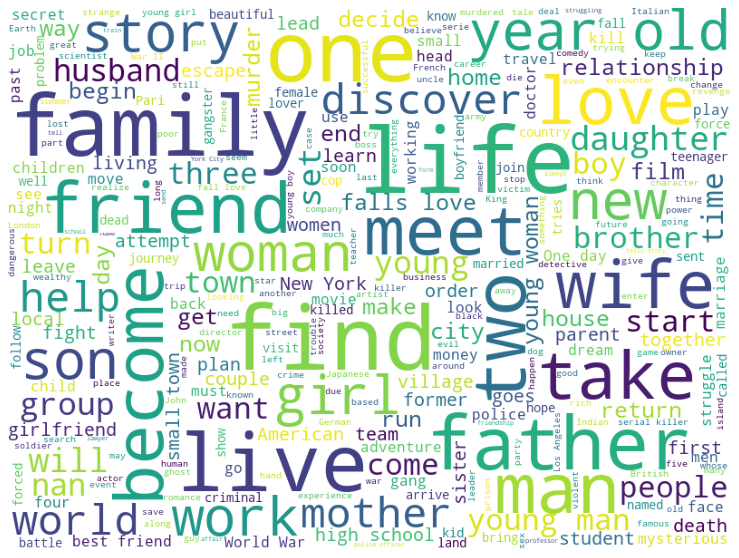

In [ ]:
wc = WordCloud(max_words=300, width=800, height=600, max_font_size=100, background_color="white")

# generate word cloud
wc.generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wc)
plt.axis("off")